## Portfolio optimization

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

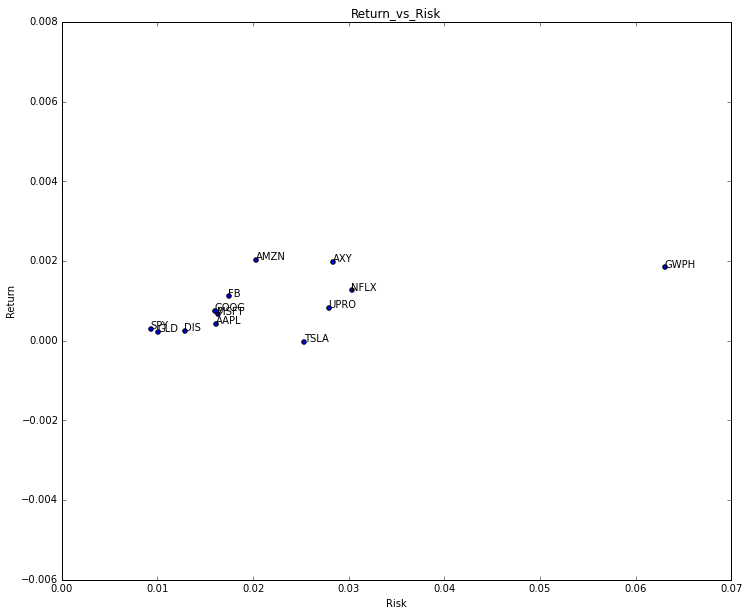

In [5]:
import os
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline 

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df
  
    
def compute_daily_returns_all(df):
    daily_returns = (df/df.shift(1)) - 1
    daily_returns.ix[0,:] = 0
    
    return daily_returns
   
    
def normalize_data(df):
    return df/ df.ix[0,:]
    
    
def compute_daily_returns_portfolio(df):
    daily_returns = (df/df.shift(1)) - 1
    daily_returns.ix[0] = 0
    
    return daily_returns

    
def show_mean_variance_scatterplot():
    
    dates = pd.date_range('2014-09-26', '2016-09-26') # Define a date range
    symbols = ['SPY','UPRO','GOOG','AAPL','AMZN','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD']
    # symbols = ['SPY', 'AMZN', 'FB', 'AXY', 'AAPL'] # Choose stock symbols to read
    df = get_data(symbols, dates) # Get stock data
    df.fillna(method="ffill", inplace="True") # Forward fill empty trade dates (for AXY)
    df.fillna(method="bfill", inplace="True") # backfill empty trade dates (for AXY)
    
    # Compute daily returns
    daily_returns_all = compute_daily_returns_all(df)
    daily_returns_all = daily_returns_all[1:] # Remove first row "0"
    
    
    df_normalized = normalize_data(df) # Normalize stock prices
    
    daily_returns_stocks = compute_daily_returns_portfolio(df_normalized) # Compute daily returns
    daily_returns_stocks = daily_returns_stocks[1:] # Remove first row "0" for portfolio calculations
    
    
    # need to turn following manual code into a loop...
    print "\n"
    daily_return_SPY = daily_returns_stocks['SPY'].mean()
    daily_risk_SPY = daily_returns_stocks['SPY'].std()   
    daily_return_UPRO = daily_returns_stocks['UPRO'].mean()
    daily_risk_UPRO = daily_returns_stocks['UPRO'].std()
    daily_return_GOOG = daily_returns_stocks['GOOG'].mean()
    daily_risk_GOOG = daily_returns_stocks['GOOG'].std()
    daily_return_AAPL = daily_returns_stocks['AAPL'].mean()
    daily_risk_AAPL = daily_returns_stocks['AAPL'].std()
    daily_return_AMZN = daily_returns_stocks['AMZN'].mean()
    daily_risk_AMZN = daily_returns_stocks['AMZN'].std()
    daily_return_DIS = daily_returns_stocks['DIS'].mean()
    daily_risk_DIS = daily_returns_stocks['DIS'].std()
    daily_return_NFLX = daily_returns_stocks['NFLX'].mean()
    daily_risk_NFLX = daily_returns_stocks['NFLX'].std()
    daily_return_FB = daily_returns_stocks['FB'].mean()
    daily_risk_FB = daily_returns_stocks['FB'].std()
    daily_return_AXY = daily_returns_stocks['AXY'].mean()
    daily_risk_AXY = daily_returns_stocks['AXY'].std()
    daily_return_TSLA = daily_returns_stocks['TSLA'].mean()
    daily_risk_TSLA = daily_returns_stocks['TSLA'].std()
    daily_return_GWPH = daily_returns_stocks['GWPH'].mean()
    daily_risk_GWPH = daily_returns_stocks['GWPH'].std()
    daily_return_MSFT = daily_returns_stocks['MSFT'].mean()
    daily_risk_MSFT = daily_returns_stocks['MSFT'].std()
    daily_return_GLD = daily_returns_stocks['GLD'].mean()
    daily_risk_GLD = daily_returns_stocks['GLD'].std()
    x_risk = np.array([daily_risk_SPY,daily_risk_UPRO,daily_risk_GOOG,daily_risk_AAPL, daily_risk_AMZN,daily_risk_DIS,daily_risk_NFLX, daily_risk_FB, daily_risk_AXY, daily_risk_TSLA, daily_risk_GWPH, daily_risk_MSFT, daily_risk_GLD],)
    y_return = np.array([daily_return_SPY, daily_return_UPRO, daily_return_GOOG, daily_return_AAPL, daily_return_AMZN, daily_return_DIS, daily_return_NFLX, daily_return_FB, daily_return_AXY, daily_return_TSLA, daily_return_GWPH, daily_return_MSFT, daily_return_GLD],)
    
    # scatterplot return vs risk...
    plt.figure(figsize=(12,10))
    plt.scatter(x_risk, y_return)
    plt.title("Return_vs_Risk")
    plt.xlabel("Risk")
    plt.ylabel("Return")
    plt.annotate("SPY", (x_risk[0], y_return[0]))
    plt.annotate("UPRO", (x_risk[1], y_return[1]))
    plt.annotate("GOOG", (x_risk[2], y_return[2]))
    plt.annotate("AAPL", (x_risk[3], y_return[3]))
    plt.annotate("AMZN", (x_risk[4], y_return[4]))
    plt.annotate("DIS", (x_risk[5], y_return[5]))
    plt.annotate("NFLX", (x_risk[6], y_return[6]))
    plt.annotate("FB", (x_risk[7], y_return[7]))
    plt.annotate("AXY", (x_risk[8], y_return[8]))
    plt.annotate("TSLA", (x_risk[9], y_return[9]))
    plt.annotate("GWPH", (x_risk[10], y_return[10]))
    plt.annotate("MSFT", (x_risk[11], y_return[11]))
    plt.annotate("GLD", (x_risk[12], y_return[12]))
    plt.show()
    
    # print "\n"
    # print ("Average daily return - SPY: {0:.9f}".format(round(daily_return_SPY,9)))
    # print ("Average daily risk - SPY: {0:.9f}".format(round(daily_risk_SPY,9)))
    
    
if __name__ == "__main__":
    show_mean_variance_scatterplot()